## Imports libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [16]:
df = pd.read_csv("C:/Users/user/Downloads/Online_Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Removing null values from dataset

In [17]:
df = df.dropna()

## Check null values

In [18]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Creating a new DataFrame with positive Quantity values

In [19]:
retail_df = df.loc[df['Quantity'] >= 0]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Grouping the data by product and calculating total quantities sold

In [20]:
top_products=retail_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print('The top-selling product is:',top_products.head(10))

The top-selling product is: Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


## 1.  What is the top-selling product?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


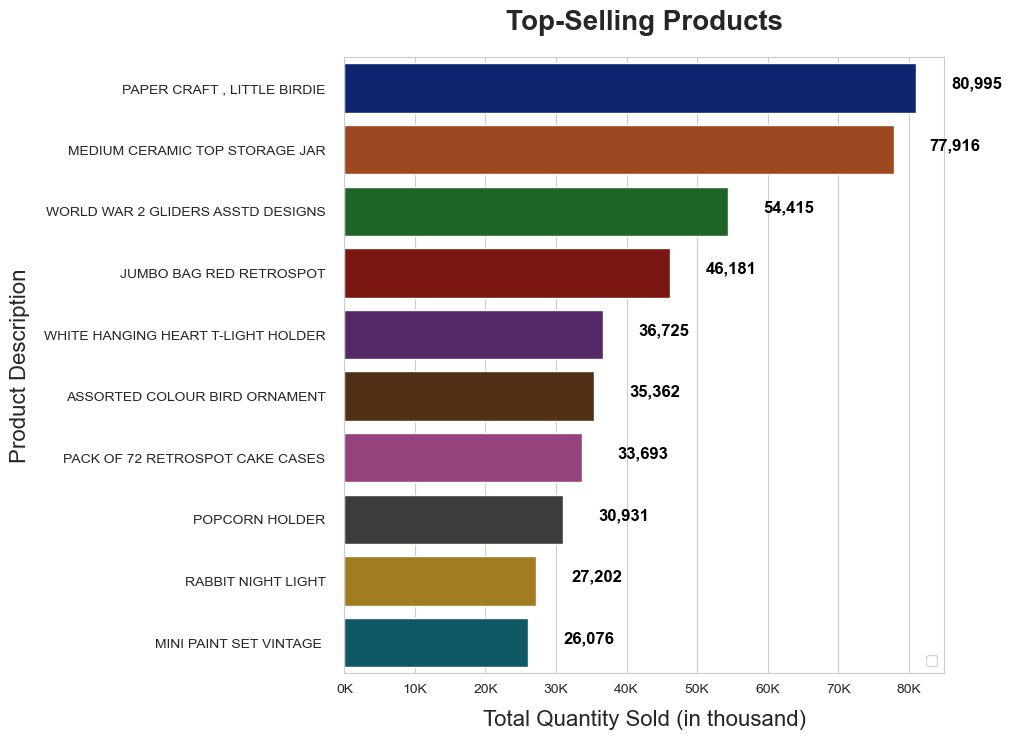

In [32]:
# Set the seaborn style to whitegrid
sns.set_style("whitegrid")

# Define the color palette
colors = sns.color_palette("dark", len(top_products)) # Set a custom color palette using the "mako_r" colormap

# Plot the top-selling products horizontally using sns.barplot
ax = sns.barplot(x=top_products[:10], y=top_products.index[:10], palette=colors)

# Set the plot title and labels
plt.title('Top-Selling Products', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Total Quantity Sold (in thousand)', fontsize=16, labelpad=10)
plt.ylabel('Product Description', fontsize=16, labelpad=10)

# Customize the y-axis ticks
ax.tick_params(axis='y', labelsize=10, pad=10)

# Customize the x-axis ticks and labels
ax.set_xticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in ax.get_xticks()], fontsize=10, rotation=0)

# Add value labels to the bars
for i, v in enumerate(top_products[:10]):
    ax.text(v + 5000, i, '{:,.0f}'.format(v), fontsize=12, color='black', fontweight='bold')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='lower right', fontsize=14)
plt.legend(loc='lower right')

# Set the plot size and save it as a PNG file
plt.subplots_adjust(left=0.3)
plt.gcf().set_size_inches(10, 8)
plt.savefig('top_products.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## 2. Which countries have the highest purchase volume?

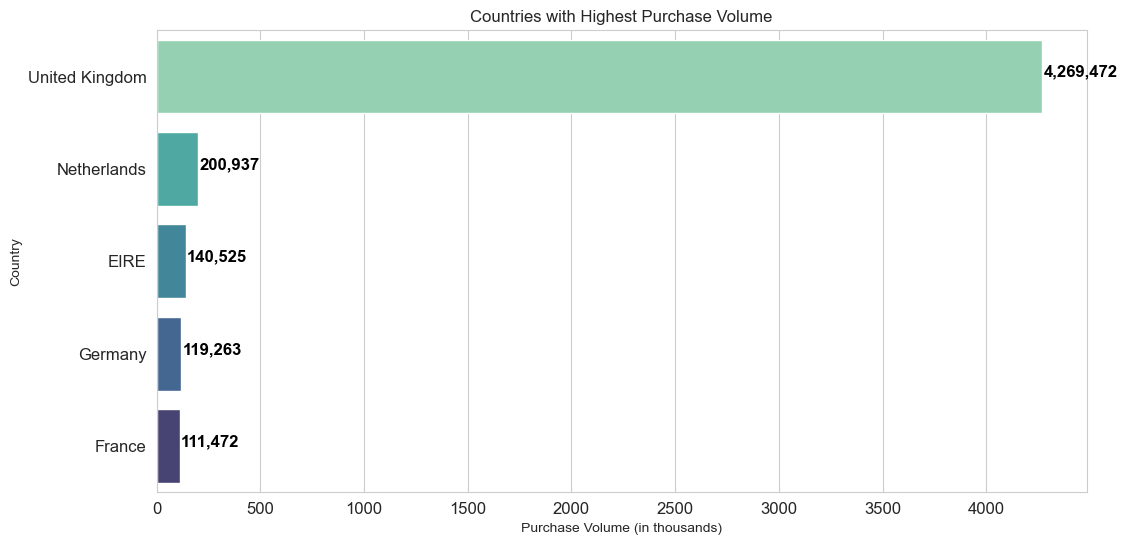

In [23]:
# Group by country and sum the purchase volume
country_purchase=retail_df.groupby('Country')['Quantity'].sum().reset_index()

# Sort by purchase volume in descending order
top_countries=country_purchase.sort_values(by='Quantity',ascending=False).head(5)

# Set the seaborn style and color palette
sns.set_style('whitegrid')
sns.set_palette('mako_r')

# Create a horizontal bar chart using sns.barplot
plt.figure(figsize=(12,6))
ax=sns.barplot(x=top_countries['Quantity']/1000,y='Country',data=top_countries)

# Customize the plot
plt.xlabel('Purchase Volume (in thousands)')
plt.ylabel('Country')
plt.title('Countries with Highest Purchase Volume')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels to the bars
for i, v in enumerate(top_countries['Quantity']):
        ax.text(v/1000 + 5,i,'{:,.0f}'.format(v),fontsize=12,color='black',fontweight='bold')

# Show the plot
plt.show()

## Filter out unwanted attributes


In [24]:
# Define the list of unwanted attributes
unwanted_attributes = ['20712', '?', '? sold as sets?', '??', '?? missing', '???', '????damgages????', '????missing', '???lost', '???missing', '?display?', '?lost', '?missing', '?sold as sets?']

# Filter out rows that contain any of the unwanted values in the 'attribute_name' column
df_filtered = retail_df[~retail_df['Description'].isin(unwanted_attributes)]

## Extract the day, month, year, and time information

In [30]:
# Convert the 'Invoice' column to a datetime data type
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Extract the day, month, year, and time information into separate columns
retail_df['Day'] = retail_df['InvoiceDate'].dt.day
retail_df['Month'] = retail_df['InvoiceDate'].dt.month
retail_df['Year'] = retail_df['InvoiceDate'].dt.year
retail_df['Time'] = retail_df['InvoiceDate'].dt.time

## 3. Are there any relation between the purchase of certain products and the throughout the month?


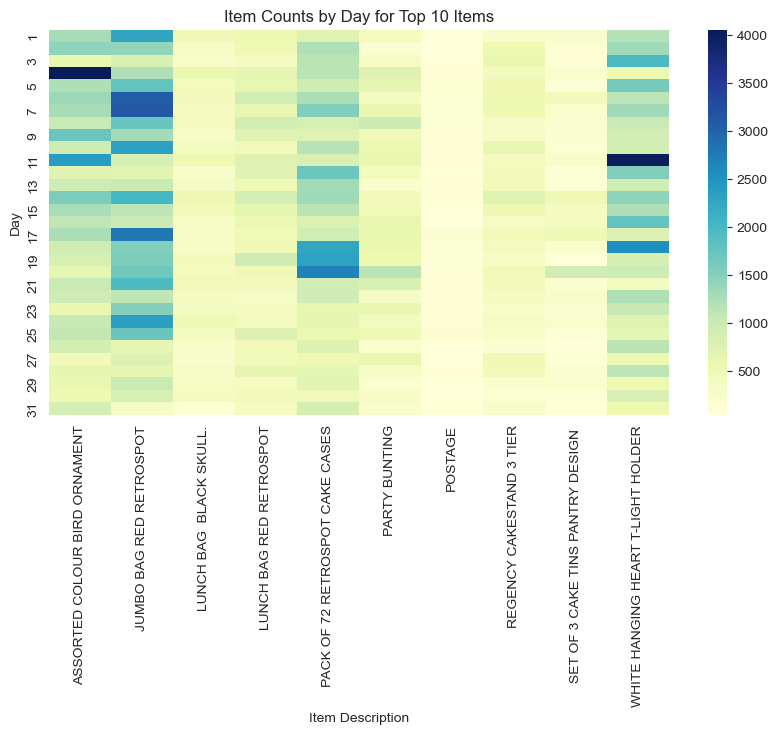

In [26]:
# get the top 10 most frequent items by count
top_items = retail_df['Description'].value_counts().nlargest(10).index

# filter the data to only include the top 10 items
df_top_items = retail_df[retail_df['Description'].isin(top_items)]

# pivot the data to create a table of item counts by day
df_pivot = df_top_items.pivot_table(index='Day', columns='Description', values='Quantity', aggfunc='sum')

# create a heatmap of the data
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_pivot, cmap='YlGnBu')

# customize the plot
plt.title('Item Counts by Day for Top 10 Items')
plt.xlabel('Item Description')
plt.ylabel('Day')

plt.show()

## 4. What are the sales trends by month, day of week, and time of day?


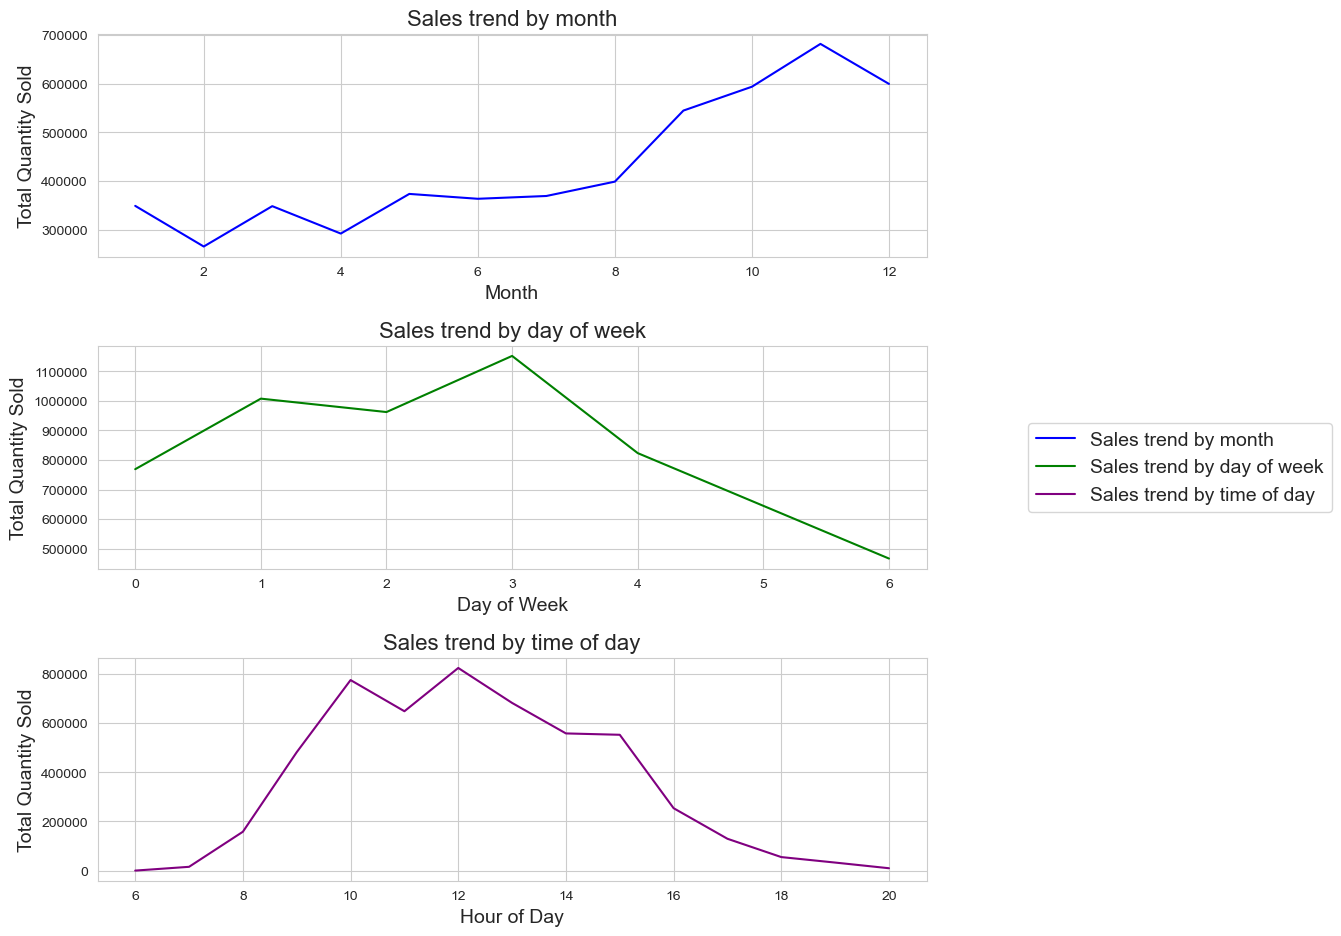

In [31]:
# Convert the "InvoiceDate" column to a datetime format
retail_df["InvoiceDate"]=pd.to_datetime(retail_df["InvoiceDate"])

# Extract the month, day of week, and time of day
retail_df["Month"]=retail_df["InvoiceDate"].dt.month
retail_df["DayOfWeek"]=retail_df["InvoiceDate"].dt.dayofweek
retail_df["TimeOfDay"]=retail_df["InvoiceDate"].dt.hour

# Create subplots for each chart
fig,axs=plt.subplots(nrows=3,ncols=1,figsize=(10,10))

# Sales trend by month
retail_df.groupby("Month")["Quantity"].sum().plot(ax=axs[0],kind="line",color="blue")
axs[0].set_title("Sales trend by month",fontsize=16)
axs[0].set_xlabel("Month",fontsize=14)
axs[0].set_ylabel("Total Quantity Sold",fontsize=14)
axs[0].yaxis.get_major_locator().set_params(integer=True)

# Sales trend by day of week
retail_df.groupby("DayOfWeek")["Quantity"].sum().plot(ax=axs[1],kind="line",color="green")
axs[1].set_title("Sales trend by day of week",fontsize=16)
axs[1].set_xlabel("Day of Week",fontsize=14)
axs[1].set_ylabel("Total Quantity Sold",fontsize=14)
axs[1].yaxis.set_major_formatter('{:.0f}'.format)

# Sales trend by time of day
retail_df.groupby("TimeOfDay")["Quantity"].sum().plot(ax=axs[2],kind="line",color="purple")
axs[2].set_title("Sales trend by time of day",fontsize=16)
axs[2].set_xlabel("Hour of Day",fontsize=14)
axs[2].set_ylabel("Total Quantity Sold",fontsize=14)
axs[2].yaxis.get_major_locator().set_params(integer=True)

# Add a legend
fig.legend(labels=["Sales trend by month","Sales trend by day of week","Sales trend by time of day"], fontsize=14, bbox_to_anchor=(1.05, 0.5), loc='center left')

# Adjust the layout and spacing
plt.tight_layout(pad=3.0)
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()